In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import scipy.stats as stats
import scipy.optimize as spo
from scipy.optimize import minimize
from helpers_similarity import *
from helpers_optimization import *

In [2]:
# standard deviation of spherical Gaussian distribution
mu = 0.0 
sigma_u = 1.0
sigma_v = 1.0
sigma = 0.2#[0, 0.2, 0.4, 0.6, 0.8, 1] 
# hello
D = 2 #dimension
N_vals = [10, 20, 30, 40, 50]
M_vals = [10, 20, 30, 40, 50]
nb_iter = 100 #1000

optimize the objective function by minimizing it w.r.t U and V respectively 

In [3]:
def optimization_fn(M,N):
    U, V, R = generate_U_V_R(mu, sigma_u, sigma_v, sigma, D, N, M)

    U0 = np.random.normal(mu, sigma_u, D*N) 
    V0 = np.random.normal(mu, sigma_v, D*M)
    U_res = minimize(objective_function_U, U0, args=(R, V, sigma_u, sigma_v, sigma, D, N))
    V_res = minimize(objective_function_V, V0, args=(R, U, sigma_u, sigma_v, sigma, D, M))

    U_result = 0
    if U_res.success :
        U_result = U_res.x.reshape((D, N))
    else :
        print('Minimization failure for U')
        print(U_res.message)
        U_result = U_res.x.reshape((D, N))
    diff_norm_U = frob(U, U_result)
    
    V_result = 0
    if V_res.success :
        V_result = V_res.x.reshape((D, M))
    else :
        print('Minimization failure for V')
        print(V_res.message)
        V_result = V_res.x.reshape((D, M))
    diff_norm_V = frob(V, V_result)
    
    return diff_norm_U, diff_norm_V


compute average Difference (in Frobenius/ Procrustes norm) of U, U_result and V, V_result for different values of M

In [4]:
def norm_results(M,N):
    avg_U = 0
    avg_V = 0
    n_U = 0
    n_V = 0
    for i in range(nb_iter):
        diff_U, diff_V = optimization_fn(M,N)
        if diff_U is not np.nan:
            avg_U += diff_U
            n_U += 1
        if diff_V is not np.nan:
            avg_V += diff_V
            n_V += 1
    print(avg_U, n_U)
    print(avg_V, n_V)
    avg_U /= n_U
    avg_V /= n_V
    return avg_U, avg_V

In [5]:
data = []
for i in range(len(N_vals)):
    for j in range(len(M_vals)):
        print(i,j)
        avg_U, avg_V = norm_results(M_vals[j], N_vals[i])
        row= [N_vals[i], M_vals[j], avg_U, avg_V]
        data.append(row)


0 0
33.051393468426916 100
32.831647509004796 100
0 1
20.898163913883153 100
46.670112708692145 100
0 2
16.54800989326292 100
59.85947204410825 100
0 3
14.356503313557928 100
66.81527818073792 100
0 4
Minimization failure for U
Desired error not necessarily achieved due to precision loss.
12.863686713306782 100
73.07606546126466 100
1 0
49.34812090125761 100
21.337563973688216 100
1 1
30.0022615600124 100
29.91159524741266 100
1 2
24.113171420128207 100
36.61440275840426 100
1 3
Minimization failure for U
Desired error not necessarily achieved due to precision loss.
20.907213189828028 100
42.70844849641505 100
1 4
18.056295799796807 100
47.227264577370875 100
2 0
56.269355355778444 100
16.51264399310794 100
2 1
37.521555690366775 100
23.650116599776755 100
2 2
29.455534478737547 100
29.89432601779293 100
2 3
Minimization failure for U
Desired error not necessarily achieved due to precision loss.
25.25934870955879 100
34.17650637239266 100
2 4
Minimization failure for V
Desired error no

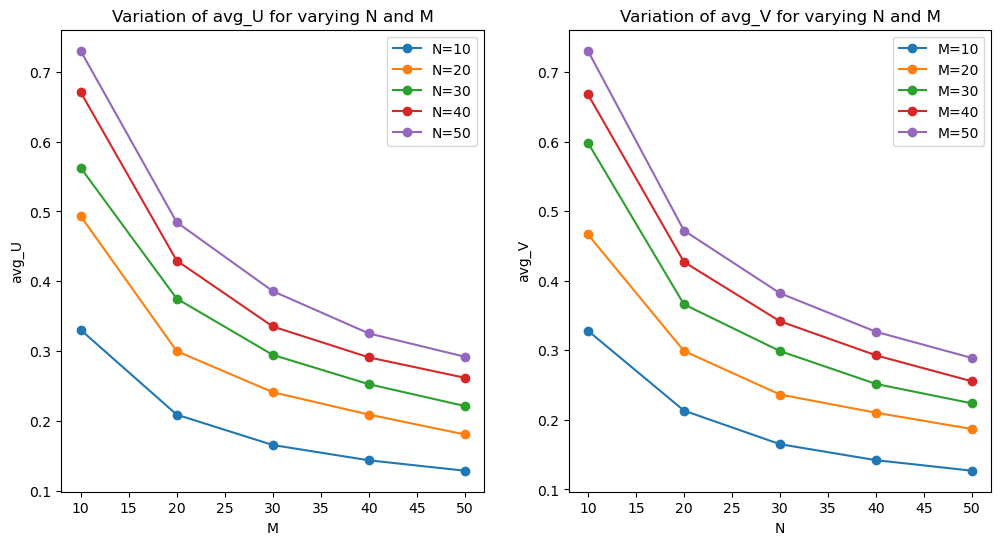

In [6]:
df = pd.DataFrame(data, columns = ['N', 'M', 'avg_U', 'avg_V'])
#df.to_csv('results_optimization.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# plot as a function of M for avg_U and as a function of N fro avg_V
for n in df['N'].unique():
    df_m = df[df['N'] == n]
    ax1.plot(df_m['M'], df_m['avg_U'], marker='o', label=f'N={n}')
for m in df['M'].unique():
    df_n = df[df['M'] == m]
    ax2.plot(df_n['N'], df_n['avg_V'], marker='o', label=f'M={m}')

ax1.set_xlabel('M')
ax1.set_ylabel('avg_U')
ax1.set_title('Variation of avg_U for varying N and M')
ax1.legend()

ax2.set_xlabel('N')
ax2.set_ylabel('avg_V')
ax2.set_title('Variation of avg_V for varying N and M')
ax2.legend()

plt.show()

 For a fixed rank/dimension d=2, we can see very comparable results with U and V (which makes sense because of the similar optimization functions we use). For U, as we increase the number of features M, the error decreases, indicating that the model is becoming more overfitted to the data (small N: number of data points and large M: number of features). On the other hand, for larger values of N, the error also decreases, but in this case, our results are more generalizable. For V, we observe that increasing the number of data points N for fixed M results in a decrease in error, indicating that the model is not complex enough and we are overfitting the data. However, as we increase M (the number of parameters), the error decreases but reaches a higher error than for a small M. This means that our model is becoming more flexible and expressive, allowing it to better capture complex relationships in the data.

In [7]:
fig.savefig('avg_U_V.png')


In [8]:
a = np.nan
b = 0
if a is not np.nan:
    print("success")